In [259]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#d = pickle.load(open("dict2pR/dict_rand_7.pkl", "rb"))

In [335]:
seeds = list(range(6,11))+[22,23,25,26,27]+list(range(30,35))+list(range(36,40))+list(range(42,54))+list(range(55,60))
dirr = ["dict2p", "dict2pR"]
def get_e(dictdir, kind):
    e1 = {}
    e2 = {}
    sigma ={}
    label = ['e1','e2','sigma']
    item = [e1,e2,sigma]
    for j in seeds:
        data = pickle.load(open(dictdir+"/dict_"+kind+"_"+str(j)+".pkl", "rb"))
        for i in range(3):
            item[i][j] = [data[label[i]]['g1'][0],data[label[i]]['g2'][0]]

    e1 = pd.DataFrame(e1, index=["e1_g1","e1_g2"]).T
    e2 = pd.DataFrame(e2, index=["e2_g1","e2_g2"]).T
    #sigma = pd.DataFrame(sigma, index=["sigma_g1","sigma_g2"]).T
    e = pd.concat([e1,e2], axis=1)
    return e

eP = get_e(dirr[0], "psfws")
eR = get_e(dirr[1], "rand")
eP.set_index([pd.Index(list(range(len(eP))))], inplace=True)
eR.set_index([pd.Index(list(range(len(eP))))], inplace=True)

Text(0, 0.5, 'g2 rand')

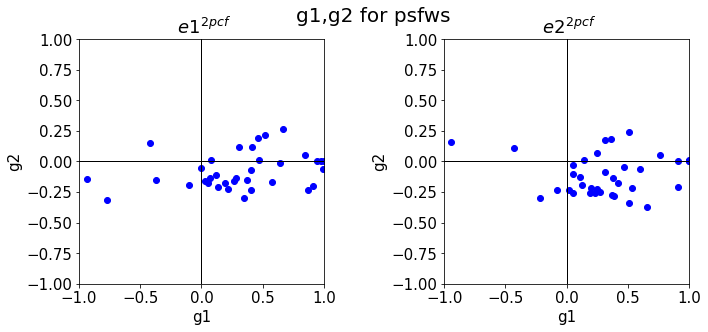

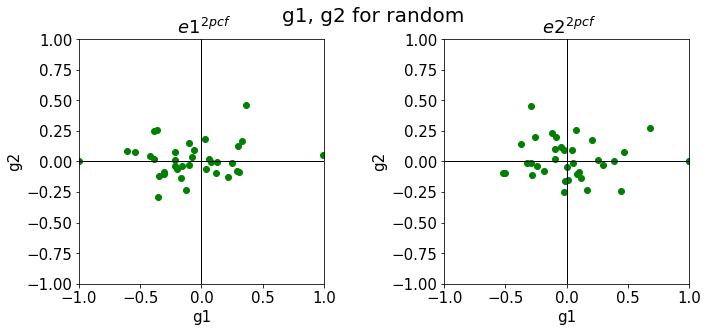

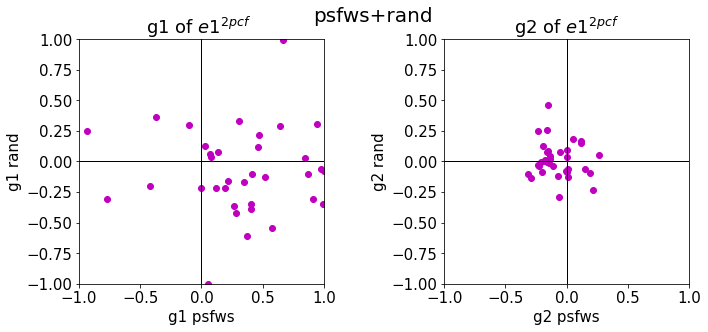

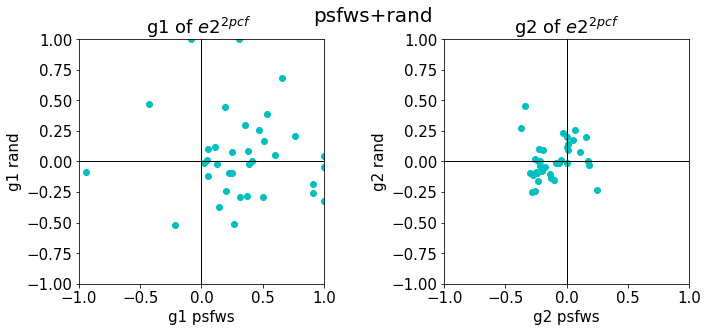

In [286]:
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
def plotplot(coord0, coord1, figtitle, axti, color, axlabel):
    fig, ax = plt.subplots(1,2, figsize=(12,4.5),sharex=True)
    ax[0].scatter(coord0[0], coord0[1], c=color)
    ax[1].scatter(coord1[0], coord1[1], c= color)
    [a.set_xlabel(axlabel[0]) for a in ax]
    [a.set_ylabel(axlabel[1]) for a in ax]
    fig.suptitle(figtitle, size=20)
    ax[0].set_title(axti[0])
    ax[1].set_title(axti[1])
    [a.set_xlim(-1,1) for a in ax]
    [a.set_ylim(-1,1) for a in ax]
    [a.set_aspect('equal') for a in ax]
    [a.axhline(linewidth=1, color='k') for a in ax]
    [a.axvline(linewidth=1, color='k') for a in ax]
    return fig,ax

# e1, e2 scatter psfws
fig1, ax1 = plotplot([eP['e1_g1'], eP["e1_g2"]],[eP['e2_g1'], eP["e2_g2"]],
         "g1,g2 for psfws", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"], "b", ["g1","g2"])

# e1, e2 scatter rand
fig2, ax2 = plotplot([eR['e1_g1'], eR["e1_g2"]],[eR['e2_g1'], eR["e2_g2"]],
         "g1, g2 for random", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"],"g", ["g1","g2"]) 

# e1 scatter psfws + rand
fig3, ax3  = plotplot([eP['e1_g1'], eR["e1_g1"]],[eP['e1_g2'], eR["e1_g2"]],
         "psfws+rand", 
         ["g1 of $e1^{2pcf}$  ","g2 of $e1^{2pcf}$ "],"m", ["g1","g2"])
ax3[0].set_xlabel("g1 psfws")
ax3[0].set_ylabel("g1 rand")
ax3[1].set_xlabel("g2 psfws")
ax3[1].set_ylabel("g2 rand")

# e2 scatter psfws + rand
fig3, ax3  = plotplot([eP['e2_g1'], eR["e2_g1"]],[eP['e2_g2'], eR["e2_g2"]],
         "psfws+rand", 
         ["g1 of $e2^{2pcf}$  ","g2 of $e2^{2pcf}$ "],"c", ["g1","g2"])
ax3[0].set_xlabel("g1 psfws")
ax3[0].set_ylabel("g1 rand")
ax3[1].set_xlabel("g2 psfws")
ax3[1].set_ylabel("g2 rand")


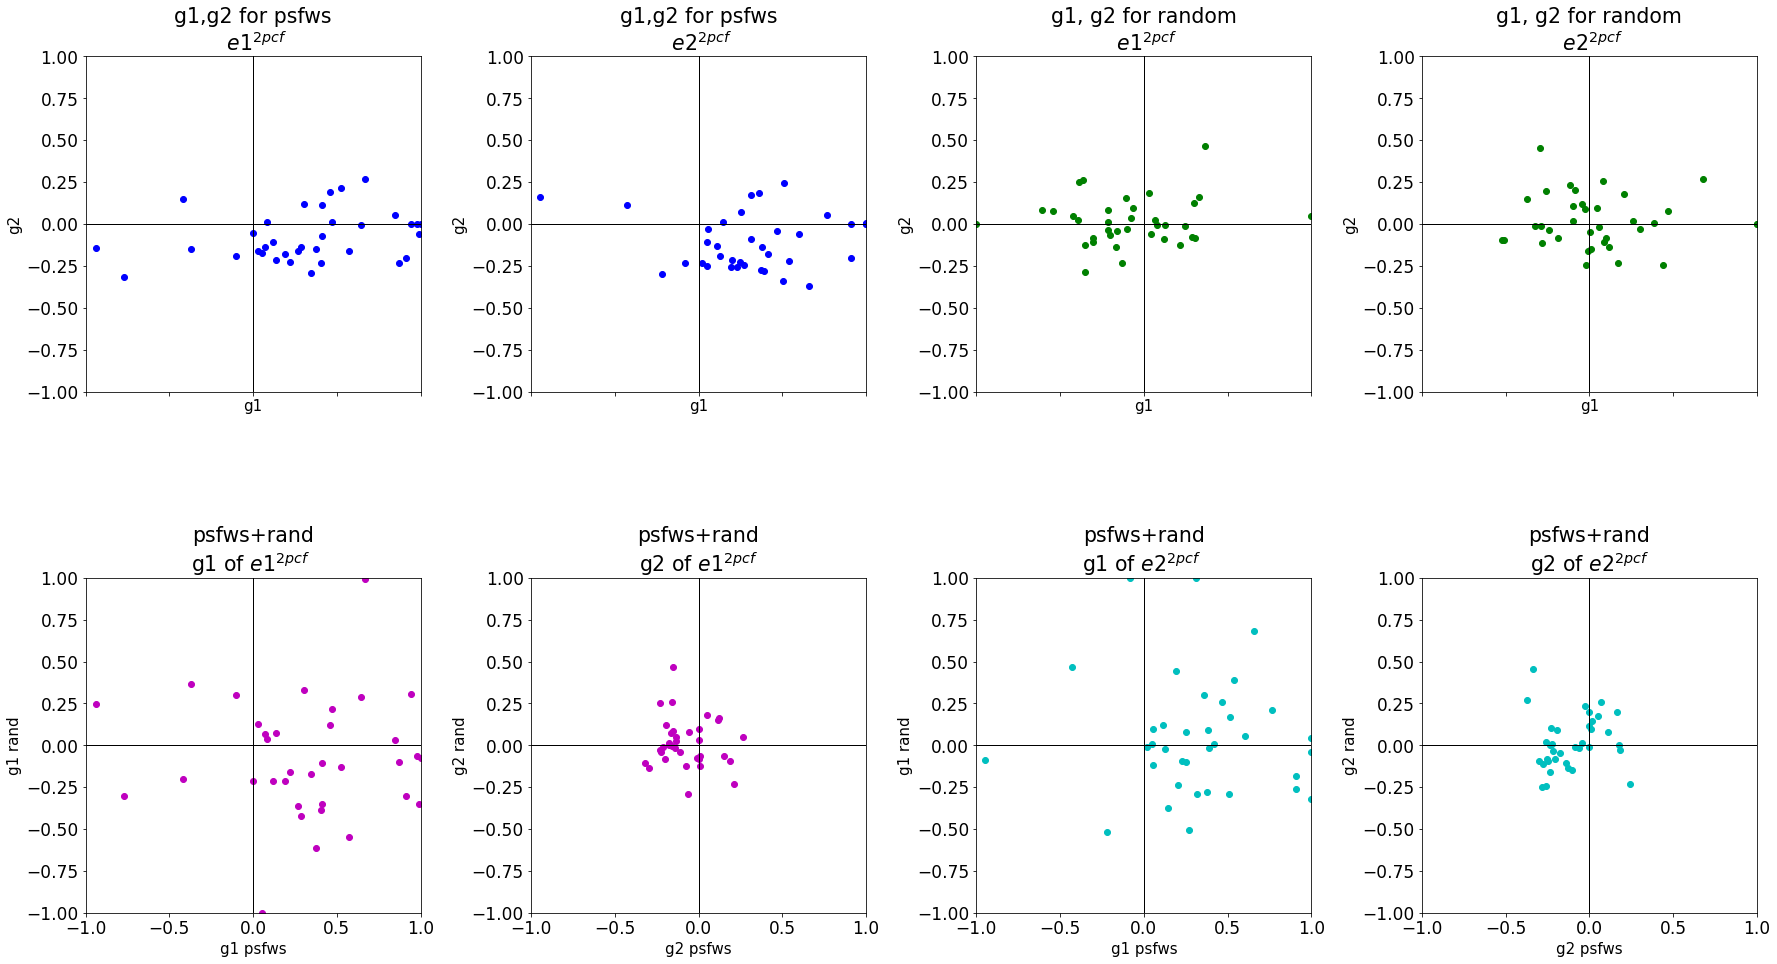

In [288]:
plt.rcParams['font.size'] = 17
plt.rcParams['axes.labelsize'] = 15
def plotplot(ax, coord0,coord1, figtitle, axti, color, axlabel):
    ax[0].scatter(coord0[0], coord0[1], c=color)
    ax[1].scatter(coord1[0], coord1[1], c= color)
    [a.set_xlabel(axlabel[0]) for a in ax]
    [a.set_ylabel(axlabel[1]) for a in ax]
    #[a.text(figtitle, size=20) for a in ax]
    ax[0].set_title(figtitle+"\n"+axti[0])
    ax[1].set_title(figtitle+"\n"+axti[1])
    [a.set_xlim(-1,1) for a in ax]
    [a.set_ylim(-1,1) for a in ax]
    [a.set_aspect('equal') for a in ax]
    [a.axhline(linewidth=1, color='k') for a in ax]
    [a.axvline(linewidth=1, color='k') for a in ax]
    return ax
fig, ax = plt.subplots(2,4, figsize=(25,15),sharex=True)
# e1, e2 scatter psfws
(ax[0,0],ax[0,1]) = plotplot([ax[0,0],ax[0,1]],[eP['e1_g1'], eP["e1_g2"]],[eP['e2_g1'], eP["e2_g2"]],
         "g1,g2 for psfws", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"], "b", ["g1","g2"])

# e1, e2 scatter rand
(ax[0,2],ax[0,3]) = plotplot([ax[0,2],ax[0,3]],[eR['e1_g1'], eR["e1_g2"]],[eR['e2_g1'], eR["e2_g2"]],
         "g1, g2 for random", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"],"g", ["g1","g2"]) 

# e1 scatter psfws + rand
(ax[1,0],ax[1,1])  = plotplot([ax[1,0],ax[1,1]], [eP['e1_g1'], eR["e1_g1"]],[eP['e1_g2'], eR["e1_g2"]],
         "psfws+rand", 
         ["g1 of $e1^{2pcf}$  ","g2 of $e1^{2pcf}$ "],"m", ["g1","g2"])

# e2 scatter psfws + rand
(ax[1,2],ax[1,3]) = plotplot([ax[1,2],ax[1,3]],[eP['e2_g1'], eR["e2_g1"]],[eP['e2_g2'], eR["e2_g2"]],
         "psfws+rand", 
         ["g1 of $e2^{2pcf}$  ","g2 of $e2^{2pcf}$ "],"c", ["g1","g2"])

[a.set_xlabel("g1 psfws") for a in [ax[1,0],ax[1,2]]]
[a.set_ylabel("g1 rand") for a in [ax[1,0],ax[1,2]]]
[a.set_xlabel("g2 psfws") for a in [ax[1,1],ax[1,3]]]
[a.set_ylabel("g2 rand") for a in [ax[1,1],ax[1,3]]]
fig.tight_layout()

In [367]:
#MY MATH
def get_phi(g1, g2):
    # this give theta in degrees
    phi = np.arctan2(g2,g1)*180/np.pi
    for i in range(len(g1)):
        if g1[i]*g2[i] > 0:
            #first, quadrant
            if g1[i] > 0:
                phi[i] = phi[i]*0.5
            #third quadrant
            else: 
                phi[i] = (360+phi[i])/2
        # second quadrant
        elif g1[i] < 0 and g2[i] > 0:
            phi[i] = (phi[i] +180)/2
        # fouth quadrant
        elif g1[i] > 0 and g2[i] < 0:
            phi[i] = (phi[i]+180)/2  
    return phi

eP["e1_phiP"] = get_phi(eP["e1_g2"],eP["e1_g1"])
eP['e2_phiP'] = get_phi(eP["e2_g2"],eP["e2_g1"])
eR['e1_phiR'] = get_phi(eR["e1_g2"],eR["e1_g1"])
eR['e2_phiR'] = get_phi(eR["e2_g2"],eR["e2_g1"])


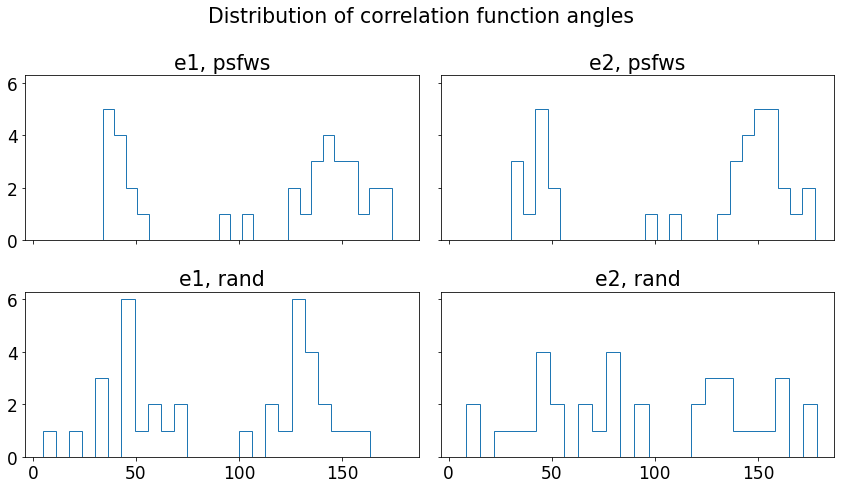

In [379]:
things = [eP["e1_phiP"], eP['e2_phiP'], eR['e1_phiR'], eR['e2_phiR']]
fig,ax =plt.subplots(2,2,figsize=(12,7), sharey=True, sharex=True)
binn = 25
ax[0,0].hist(things[0], bins=binn, histtype='step')
ax[0,1].hist(things[1], bins=binn, histtype='step')
ax[1,0].hist(things[2], bins=binn, histtype='step')
ax[1,1].hist(things[3], bins=binn, histtype='step')

ax[0,0].set_title("e1, psfws")
ax[0,1].set_title("e2, psfws")
ax[1,0].set_title("e1, rand")
ax[1,1].set_title("e2, rand")

fig.suptitle("Distribution of correlation function angles")
fig.tight_layout()

In [384]:
np.arctan2(0.5,-0.5)*180/np.pi+180

315.0